In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('data/uci-news-aggregator.csv')

In [3]:
df_encoded = pd.get_dummies(df,columns=['CATEGORY'], drop_first=True)

In [4]:
encoder = OneHotEncoder(sparse_output=False, drop=None) 
df_encoded_sklearn = encoder.fit_transform(df[['CATEGORY']])
df_encoded_sklearn = pd.DataFrame(df_encoded_sklearn, columns=encoder.get_feature_names_out(['CATEGORY']))
df_final = pd.concat([df, df_encoded_sklearn], axis=1).drop(columns=['CATEGORY'])
df_final

,ID,TITLE,URL,PUBLISHER,STORY,HOSTNAME,TIMESTAMP,CATEGORY_b,CATEGORY_e,CATEGORY_m,CATEGORY_t
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698,1.0,0.0,0.0,0.0
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207,1.0,0.0,0.0,0.0
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550,1.0,0.0,0.0,0.0
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793,1.0,0.0,0.0,0.0
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
422414,422933,Surgeons to remove 4-year-old's rib to rebuild...,http://www.cbs3springfield.com/story/26378648/...,WSHM-TV,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.cbs3springfield.com,1409229190251,0.0,0.0,1.0,0.0
422415,422934,Boy to have surgery on esophagus after battery...,http://www.wlwt.com/news/boy-to-have-surgery-o...,WLWT Cincinnati,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.wlwt.com,1409229190508,0.0,0.0,1.0,0.0
422416,422935,Child who swallowed battery to have reconstruc...,http://www.newsnet5.com/news/local-news/child-...,NewsNet5.com,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.newsnet5.com,1409229190771,0.0,0.0,1.0,0.0
422417,422936,Phoenix boy undergoes surgery to repair throat...,http://www.wfsb.com/story/26368078/phoenix-boy...,WFSB,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.wfsb.com,1409229191071,0.0,0.0,1.0,0.0


In [5]:
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle the data
df_sampled = df_final.sample(frac=0.1, random_state=42).reset_index(drop=True)

In [6]:
vectorizer = TfidfVectorizer(stop_words='english')
X_text = vectorizer.fit_transform(df_sampled['TITLE']) 

In [7]:
X_features = df_sampled.drop(columns=['TITLE', 'URL', 'PUBLISHER', 'STORY', 'HOSTNAME'])
X_features = X_features.select_dtypes(include=[np.number])
X = np.hstack((X_text.toarray(), X_features.to_numpy()))
y = df_sampled[df_encoded_sklearn.columns] 
y = df_sampled[df_encoded_sklearn.columns].idxmax(axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.2579


In [10]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Step 1: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_text = vectorizer.fit_transform(df_sampled['TITLE'])

# Step 2: Convert one-hot encoded categories to single labels
y = df_sampled[df_encoded_sklearn.columns].idxmax(axis=1).str.replace('CATEGORY_', '', regex=True)

# Step 3: Drop non-numeric columns from structured data
X_features = df_sampled.drop(columns=['TITLE', 'URL', 'PUBLISHER', 'STORY', 'HOSTNAME'])
X_features = X_features.select_dtypes(include=[float, int])  # Keep only numerical columns

# Step 4: Combine TF-IDF and numerical features
import numpy as np
X = np.hstack((X_text.toarray(), X_features.to_numpy()))

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Define Pipeline (StandardScaler + PCA + Logistic Regression)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize features
    ('pca', PCA(n_components=100, random_state=42)),  # Reduce dimensions
    ('classifier', LogisticRegression(max_iter=1000))  # Train Logistic Regression
])

# Step 7: Train the model
pipeline.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred = pipeline.predict(X_test)

# Step 9: Print Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9561


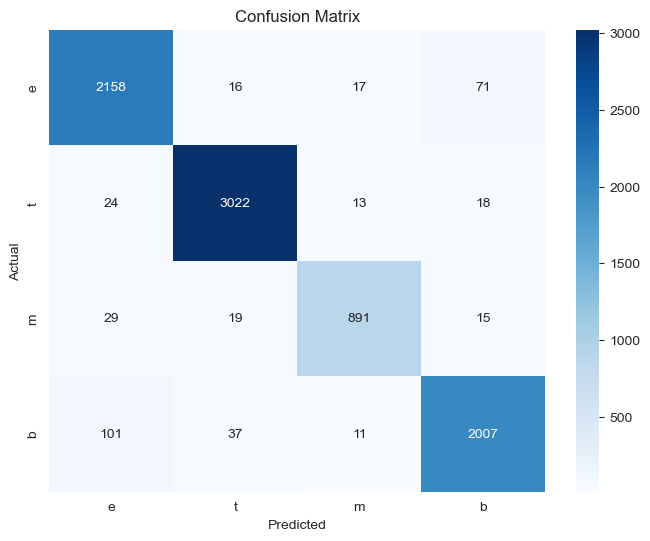

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [12]:
import numpy as np

# Get the PCA components
pca_components = pipeline.named_steps['pca'].components_

# Get the feature names from the TF-IDF vectorizer
tfidf_feature_names = np.array(vectorizer.get_feature_names_out())

# Ensure indices don't exceed the vocabulary size
vocab_size = len(tfidf_feature_names)
n_top_words = 10  # Number of top words to display

top_words_per_component = {}

for i, component in enumerate(pca_components[:5]):  # Look at first 5 principal components
    sorted_indices = np.argsort(component)[::-1]  # Sort by importance
    valid_indices = sorted_indices[sorted_indices < vocab_size]  # Keep only valid indices
    top_word_indices = valid_indices[:n_top_words]  # Select top words
    top_words = tfidf_feature_names[top_word_indices]  # Get word names
    top_words_per_component[f'PCA Component {i+1}'] = top_words

# Convert to DataFrame for easy visualization
df_top_words = pd.DataFrame(top_words_per_component)
df_top_words

,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5
0,kim,hale,mp,fontana,sandersi
1,kardashian,benson,clark,peduto,reconstruction
2,kanye,mitchell,malling,override,pelagornis
3,star,shay,trialing,puc,bradford
4,wedding,ashley,tonbridge,corbett,liz
5,awards,troian,greg,introducing,reuters
6,season,bellisario,speaks,senator,bruce
7,west,lucy,kinnear,tom,artist
8,dies,overwhelm,uk,stopim,fontana
9,video,drapery,heaven,odarim,puc


Model Accuracy on Sampled 10% of Remaining Data: 0.9567
Model F1 Score on Sampled 10% of Remaining Data: 0.9567


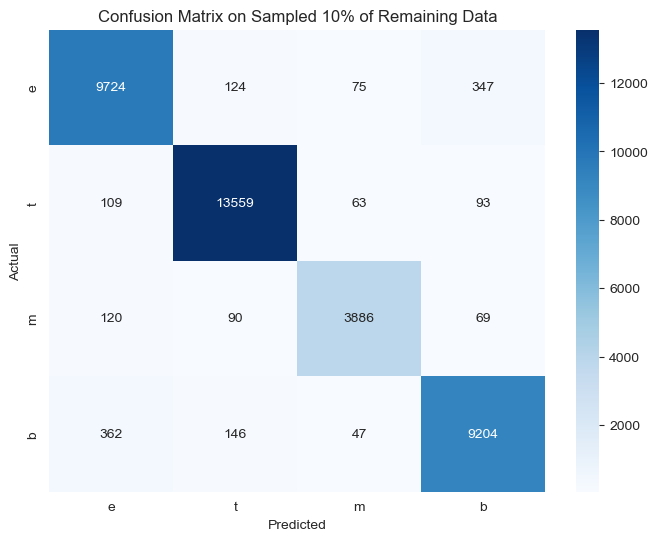

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Step 1: Get remaining 90% of the dataset
df_remaining = df_final.drop(df_sampled.index).reset_index(drop=True)

# Step 2: Randomly sample 10% of the remaining data for faster processing
df_test_sampled = df_remaining.sample(frac=0.1, random_state=42).reset_index(drop=True)

# Step 3: Apply TF-IDF transformation (use the same vectorizer as before)
X_text_test = vectorizer.transform(df_test_sampled['TITLE'])  # Use transform, NOT fit_transform

# Step 4: Convert one-hot encoded categories to labels
y_test = df_test_sampled[df_encoded_sklearn.columns].idxmax(axis=1).str.replace('CATEGORY_', '', regex=True)

# Step 5: Process numerical features
X_features_test = df_test_sampled.drop(columns=['TITLE', 'URL', 'PUBLISHER', 'STORY', 'HOSTNAME'])
X_features_test = X_features_test.select_dtypes(include=[float, int])  # Keep only numeric columns

# Step 6: Combine TF-IDF and structured features
X_test = np.hstack((X_text_test.toarray(), X_features_test.to_numpy()))

# Step 7: Make predictions using the trained model
y_pred_test = pipeline.predict(X_test)

# Step 8: Compute accuracy and F1-score
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')  # Weighted to handle class imbalance

print(f"Model Accuracy on Sampled 10% of Remaining Data: {accuracy_test:.4f}")
print(f"Model F1 Score on Sampled 10% of Remaining Data: {f1_test:.4f}")

# Step 9: Compute confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)

# Step 10: Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Sampled 10% of Remaining Data')
plt.show()


In [24]:
# Step 1: Define custom titles for testing
custom_titles = [
    "Kanye West releases new album after controversy",
    "Stock market crashes amid global economic fears",
    "Scientists discover new exoplanet with potential for life",
    "Hollywood awards night sees record-breaking wins",
    "AI technology revolutionizes healthcare industry",
    "Covid-19 is a new problem for the health of people"
]

# Step 2: Convert to DataFrame
df_custom = pd.DataFrame({'TITLE': custom_titles})

# Step 3: Process numerical features (set to zeros since we don't have structured data)
num_numerical_features = pipeline.named_steps['scaler'].n_features_in_ - vectorizer.transform(df_custom['TITLE']).shape[1]
X_features_custom = np.zeros((len(df_custom), num_numerical_features))  # Creates missing feature padding

# Step 4: Apply TF-IDF transformation (use transform, NOT fit_transform)
X_text_custom = vectorizer.transform(df_custom['TITLE']).toarray()

# Step 5: Combine TF-IDF and structured numerical features
X_custom = np.hstack((X_text_custom, X_features_custom))

# Step 6: Use the full pipeline to predict categories
y_pred_custom = pipeline.predict(X_custom)

# Step 7: Display results
for title, pred in zip(custom_titles, y_pred_custom):
    print(f"Title: {title}\nPredicted Category: {pred}\n{'-'*50}")


Title: Kanye West releases new album after controversy
Predicted Category: e
--------------------------------------------------
Title: Stock market crashes amid global economic fears
Predicted Category: b
--------------------------------------------------
Title: Scientists discover new exoplanet with potential for life
Predicted Category: t
--------------------------------------------------
Title: Hollywood awards night sees record-breaking wins
Predicted Category: b
--------------------------------------------------
Title: AI technology revolutionizes healthcare industry
Predicted Category: b
--------------------------------------------------
Title: Covid-19 is a new problem for the health of people
Predicted Category: b
--------------------------------------------------


In [26]:
import numpy as np

# Custom test titles
custom_titles = ["Covid-19 is a new problem for the health of people"]

# Convert to DataFrame
df_custom = pd.DataFrame({'TITLE': custom_titles})

# Apply TF-IDF transformation (use transform, NOT fit_transform)
X_text_custom = vectorizer.transform(df_custom['TITLE']).toarray()

# Handle missing numerical features (ensure correct shape)
num_numerical_features = pipeline.named_steps['scaler'].n_features_in_ - X_text_custom.shape[1]
X_features_custom = np.zeros((len(df_custom), num_numerical_features))  # Zero padding

# Combine TF-IDF and structured numerical features
X_custom = np.hstack((X_text_custom, X_features_custom))

# Apply PCA transformation
X_custom_pca = pipeline.named_steps['pca'].transform(X_custom)

# Get model predictions
y_pred_custom = pipeline.named_steps['classifier'].predict(X_custom_pca)

# Get prediction probabilities
y_proba = pipeline.named_steps['classifier'].predict_proba(X_custom_pca)

# Get class labels
class_labels = pipeline.named_steps['classifier'].classes_

# Display results
print(f"Title: {custom_titles[0]}")
print(f"Predicted Category: {y_pred_custom[0]}")
print("\nPrediction Probabilities:")
for label, prob in zip(class_labels, y_proba[0]):
    print(f"  {label}: {prob:.4f}")
print("-" * 50)


Title: Covid-19 is a new problem for the health of people
Predicted Category: e

Prediction Probabilities:
  b: 0.2791
  e: 0.4943
  m: 0.0412
  t: 0.1854
--------------------------------------------------


In [35]:
import pandas as pd

# Step 1: Count original category distribution
print("Original Category Counts:")
print(df['CATEGORY'].value_counts())

# Step 2: Separate health ('m') and other categories ('b', 'e', 't')
df_health = df[df['CATEGORY'] == 'm'].sample(n=10_000, random_state=42, replace=True)  # Sample 10k from health
df_other = df[df['CATEGORY'] != 'm'].groupby('CATEGORY').sample(n=10000, random_state=42, replace=True)  # Sample 3,333 from each

# Step 3: Merge both sampled datasets
df_balanced = pd.concat([df_health, df_other]).reset_index(drop=True)

# Step 4: Check the new category distribution
print("Balanced Category Counts:")
print(df_balanced['CATEGORY'].value_counts())


Original Category Counts:
CATEGORY
e    152469
b    115967
t    108344
m     45639
Name: count, dtype: int64
Balanced Category Counts:
CATEGORY
m    10000
b    10000
e    10000
t    10000
Name: count, dtype: int64


In [67]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Step 1: Encode category labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_balanced['CATEGORY'])  # Converts ['b', 'e', 'm', 't'] → [0,1,2,3]

# Step 2: Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),  # TF-IDF for text processing
    ('pca', PCA(n_components=150, random_state=42)),  # Reduce to 200 dimensions
    ('scaler', StandardScaler()),  # Normalize features
    ('xgb', XGBClassifier(n_estimators=500, use_label_encoder=False, eval_metric='mlogloss', random_state=42))  # XGBoost with 1000 trees
])

# Step 3: Define 10-Fold Stratified Cross-Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Step 4: Evaluate the model using F1-score
scoring = make_scorer(f1_score, average='weighted')  # Weighted F1-score
cv_scores = cross_val_score(pipeline, df_balanced['TITLE'], y_encoded, cv=cv, scoring=scoring, n_jobs=-1)

# Step 5: Display Results
print("\n🚀 10-Fold Cross-Validation Results:")
print(f"F1-score per fold: {cv_scores}")
print(f"\n🔥 Mean F1-score: {cv_scores.mean():.4f}")
print(f"📊 Standard Deviation: {cv_scores.std():.4f}")


/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:47:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:47:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:47:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:47:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.


🚀 10-Fold Cross-Validation Results:
F1-score per fold: [0.87271547 0.86198168 0.86714354 0.86442919 0.86013971 0.86243021
 0.86005361 0.85973019 0.863884   0.86668104]

🔥 Mean F1-score: 0.8639
📊 Standard Deviation: 0.0039


/Users/youssefmalek/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:49:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


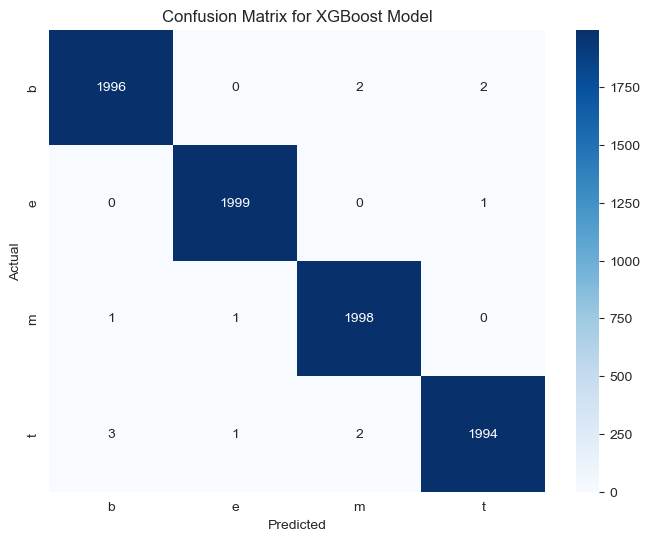


🛑 **Misclassified Samples (10 per category)** 🛑

🔹 **Title:** Posted by Parvez Jabri
   ✅ **Actual Category:** t
   ❌ **Predicted Category:** b
--------------------------------------------------------------------------------
🔹 **Title:** Amazon Unveils Its First Smartphone
   ✅ **Actual Category:** b
   ❌ **Predicted Category:** t
--------------------------------------------------------------------------------
🔹 **Title:** Names & Faces
   ✅ **Actual Category:** m
   ❌ **Predicted Category:** e
--------------------------------------------------------------------------------
🔹 **Title:** Microsoft finally unveils Office for the iPad
   ✅ **Actual Category:** t
   ❌ **Predicted Category:** b
--------------------------------------------------------------------------------
🔹 **Title:** Phenomena:
   ✅ **Actual Category:** t
   ❌ **Predicted Category:** m
--------------------------------------------------------------------------------
🔹 **Title:** KLAUS JURGENS
   ✅ **Actual Category:** b


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

pipeline.fit(df_balanced['TITLE'], y_encoded)
# Step 1: Predict on Test Data
y_pred = pipeline.predict(X_test)

# Step 2: Convert Numeric Predictions Back to Category Labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

# Step 3: Compute Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)

# Step 4: Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGBoost Model")
plt.show()

# Step 5: Identify Misclassified Examples
df_test_results = pd.DataFrame({'TITLE': X_test, 'True_Category': y_test_labels, 'Predicted_Category': y_pred_labels})

# Filter misclassified examples
misclassified = df_test_results[df_test_results["True_Category"] != df_test_results["Predicted_Category"]]

# Get 10 misclassified examples from each true category
misclassified_samples = misclassified.groupby("True_Category").head(10)

# Step 6: Print misclassified samples in a readable format
print("\n🛑 **Misclassified Samples (10 per category)** 🛑\n")
for index, row in misclassified_samples.iterrows():
    print(f"🔹 **Title:** {row['TITLE']}")
    print(f"   ✅ **Actual Category:** {row['True_Category']}")
    print(f"   ❌ **Predicted Category:** {row['Predicted_Category']}")
    print("-" * 80)


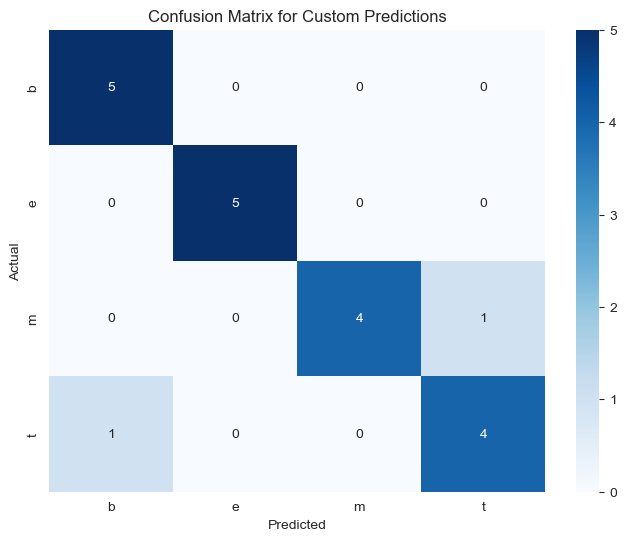

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Define custom test examples with their true categories
custom_titles = [
    ("Kanye West releases new album after controversy", "e"),  # Entertainment
    ("Stock market crashes amid global economic fears", "b"),  # Business
    ("Scientists discover new exoplanet with potential for life", "t"),  # Technology
    ("Hollywood awards night sees record-breaking wins", "e"),  # Entertainment
    ("AI technology revolutionizes healthcare industry", "m"),  # Health
    ("Covid-19 is a new problem for the health of people", "m"),  # Health
    ("Federal Reserve announces interest rate hikes", "b"),  # Business
    ("NASA's Mars rover finds signs of ancient water", "t"),  # Technology
    ("New movie breaks box office records", "e"),  # Entertainment
    ("Medical breakthrough in cancer treatment discovered", "m"),  # Health
    ("Tesla launches new electric car model", "t"),  # Technology
    ("Cryptocurrency regulations tighten across Europe", "b"),  # Business
    ("Famous actor wins best performance award", "e"),  # Entertainment
    ("Breakthrough in AI speeds up medical diagnosis", "m"),  # Health
    ("Facebook faces new privacy lawsuit", "t"),  # Technology
    ("Global oil prices surge amid supply concerns", "b"),  # Business
    ("TV show finale sparks major fan reactions", "e"),  # Entertainment
    ("New flu variant spreads rapidly across continents", "m"),  # Health
    ("Quantum computing achieves major milestone", "t"),  # Technology
    ("Amazon faces labor strikes at major warehouses", "b")  # Business
]

# Step 2: Convert into DataFrame
df_custom = pd.DataFrame(custom_titles, columns=["TITLE", "True_Category"])

# Step 3: Use the pipeline to predict categories
y_pred_custom = pipeline.predict(df_custom["TITLE"])  # Predict categories

# Step 4: Convert numeric predictions back to category labels
y_pred_labels = label_encoder.inverse_transform(y_pred_custom)

# Step 5: Add predictions to DataFrame
df_custom["Predicted_Category"] = y_pred_labels

# Step 6: Compute Confusion Matrix
cm = confusion_matrix(df_custom["True_Category"], df_custom["Predicted_Category"], labels=label_encoder.classes_)

# Step 7: Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Custom Predictions")
plt.show()

# Step 8: Identify misclassified examples (10 per category)
misclassified = df_custom[df_custom["True_Category"] != df_custom["Predicted_Category"]]
misclassified_samples = misclassified.groupby("True_Category").head(10)


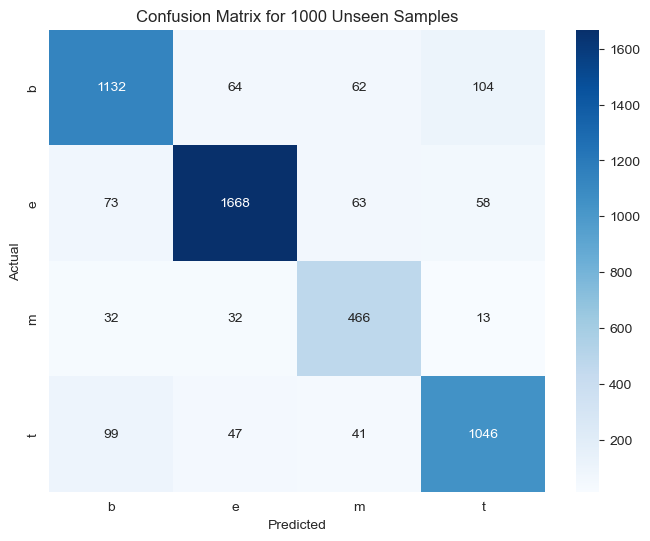

(0.8631774147754467, 0.8482666795338296)

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Get remaining data that was NOT used for training
df_unseen = df.drop(df_balanced.index).reset_index(drop=True)  # Remove trained data

# Step 2: Randomly sample 1000 data points from the unseen dataset
df_sampled = df_unseen.sample(n=5000, random_state=42).reset_index(drop=True)

# Step 3: Use the trained pipeline to predict categories
y_pred_sampled = pipeline.predict(df_sampled["TITLE"])  # Predict categories

# Step 4: Convert numeric predictions back to category labels
y_pred_labels_sampled = label_encoder.inverse_transform(y_pred_sampled)
y_true_labels_sampled = label_encoder.inverse_transform(label_encoder.transform(df_sampled["CATEGORY"]))

# Step 5: Add predictions to DataFrame
df_sampled["True_Category"] = y_true_labels_sampled
df_sampled["Predicted_Category"] = y_pred_labels_sampled

# Step 6: Compute Confusion Matrix
cm = confusion_matrix(df_sampled["True_Category"], df_sampled["Predicted_Category"], labels=label_encoder.classes_)

# Step 7: Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for 1000 Unseen Samples")
plt.show()

# Step 8: Identify misclassified examples (10 per category)
misclassified = df_sampled[df_sampled["True_Category"] != df_sampled["Predicted_Category"]]
misclassified_samples = misclassified.groupby("True_Category").head(10)

from sklearn.metrics import f1_score

# Step 1: Compute F1 Score for the sampled data
f1_weighted = f1_score(df_sampled["True_Category"], df_sampled["Predicted_Category"], average='weighted')
f1_macro = f1_score(df_sampled["True_Category"], df_sampled["Predicted_Category"], average='macro')

# Display results
f1_weighted, f1_macro



In [71]:
import joblib
joblib.dump(pipeline, "news_classifier.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']